<a href="https://colab.research.google.com/github/Hadia015/DALagProject/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##Research questions: Are the bus delay/breakdowns increasing or decreasing annually?
##Which year had the highest incidents? What was the top reason for delay/breakdown?
##How does the highest incident year compare to the most recent year? Did the top delay reason stay the same?
##import pandas
import pandas as pd

In [2]:
##Importing data by saving the dataset in google drive and mounting the drive
df = pd.read_csv("/content/drive/MyDrive/Bus_Breakdown_and_Delays_20250519.csv")

<ipython-input-2-b6265037e80b>:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Bus_Breakdown_and_Delays_20250519.csv")


In [3]:
##data exploration
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,11/5/2015 8:10,11/5/2015 8:12,New Jersey,...,NaN,11,Yes,No,Yes,11/5/2015 8:12,NaN,11/5/2015 8:12,Running Late,School-Age
1,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,6716,11/5/2015 8:10,11/5/2015 8:12,Manhattan,...,20MNS,2,Yes,Yes,No,11/5/2015 8:12,NaN,11/5/2015 8:13,Running Late,School-Age
2,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,11/5/2015 8:09,11/5/2015 8:13,Bronx,...,15MIN,8,Yes,Yes,Yes,11/5/2015 8:13,NaN,11/5/2015 8:13,Running Late,Pre-K
3,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,2699,11/5/2015 8:12,11/5/2015 8:14,Manhattan,...,15 MIN,6,No,No,No,11/5/2015 8:14,NaN,11/5/2015 8:14,Running Late,School-Age
4,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,2116,11/5/2015 8:13,11/5/2015 8:14,Manhattan,...,NaN,6,No,No,No,11/5/2015 8:14,NaN,11/5/2015 8:14,Running Late,School-Age


In [4]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [5]:
df.shape

(745152, 21)

In [6]:
##removing any rows with missing values
df = df.dropna()
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
496,2015-2016,1228925,Special Ed AM Run,31324,X400,Accident,10444,11/12/2015 7:20,11/12/2015 7:41,Bronx,...,45-50 MIN,3,Yes,Yes,Yes,11/12/2015 7:41,2787061,11/12/2015 7:41,Running Late,School-Age
614,2015-2016,1229092,General Ed PM Run,21792,M9084,Accident,2751,11/12/2015 14:20,11/12/2015 14:27,Manhattan,...,1 HOUR,0,Yes,No,Yes,11/12/2015 14:27,2787899,11/12/2015 14:33,Running Late,School-Age
1087,2017-2018,1424117,Special Ed AM Run,44127,W828,Heavy Traffic,75944,3/26/2018 7:12,3/26/2018 7:13,Westchester,...,16-30 Min,0,Yes,Yes,Yes,3/26/2018 7:13,90547608,3/26/2018 8:58,Running Late,School-Age
1168,2017-2018,1401862,Special Ed AM Run,VN0234,W940,Heavy Traffic,75816,1/10/2018 6:39,1/10/2018 7:06,Westchester,...,46-60 Min,0,Yes,Yes,Yes,1/10/2018 7:06,X,1/1/1900 0:00,Running Late,School-Age
1633,2015-2016,1230544,General Ed PM Run,2590,X9005,Other,10118,11/18/2015 13:30,11/18/2015 13:48,Bronx,...,2hr,0,Yes,Yes,Yes,11/18/2015 13:48,2792058,11/18/2015 14:41,Running Late,School-Age


In [7]:
##deleting columns not needed
drop_columns = ['Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents','Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number','Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK']
df = df.drop(drop_columns, axis=1)
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus
496,2015-2016,1228925,Special Ed AM Run,31324,X400,Accident,10444,11/12/2015 7:20,11/12/2015 7:41,Bronx,"BORO TRANSIT, INC.",45-50 MIN,3
614,2015-2016,1229092,General Ed PM Run,21792,M9084,Accident,2751,11/12/2015 14:20,11/12/2015 14:27,Manhattan,SNT BUS INC,1 HOUR,0
1087,2017-2018,1424117,Special Ed AM Run,44127,W828,Heavy Traffic,75944,3/26/2018 7:12,3/26/2018 7:13,Westchester,"MONTAUK STUDENT TRANS, INC. (B2321)",16-30 Min,0
1168,2017-2018,1401862,Special Ed AM Run,VN0234,W940,Heavy Traffic,75816,1/10/2018 6:39,1/10/2018 7:06,Westchester,VAN TRANS LLC (B2192),46-60 Min,0
1633,2015-2016,1230544,General Ed PM Run,2590,X9005,Other,10118,11/18/2015 13:30,11/18/2015 13:48,Bronx,BOBBY`S BUS CO. INC.,2hr,0


In [8]:
##renaming Columns
df = df.rename(columns={'Boro':'Borough'})
df = df.rename(columns={'Reason':'Breakdown/Delay Reason'})
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Breakdown/Delay Reason,Schools_Serviced,Occurred_On,Created_On,Borough,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus
496,2015-2016,1228925,Special Ed AM Run,31324,X400,Accident,10444,11/12/2015 7:20,11/12/2015 7:41,Bronx,"BORO TRANSIT, INC.",45-50 MIN,3
614,2015-2016,1229092,General Ed PM Run,21792,M9084,Accident,2751,11/12/2015 14:20,11/12/2015 14:27,Manhattan,SNT BUS INC,1 HOUR,0
1087,2017-2018,1424117,Special Ed AM Run,44127,W828,Heavy Traffic,75944,3/26/2018 7:12,3/26/2018 7:13,Westchester,"MONTAUK STUDENT TRANS, INC. (B2321)",16-30 Min,0
1168,2017-2018,1401862,Special Ed AM Run,VN0234,W940,Heavy Traffic,75816,1/10/2018 6:39,1/10/2018 7:06,Westchester,VAN TRANS LLC (B2192),46-60 Min,0
1633,2015-2016,1230544,General Ed PM Run,2590,X9005,Other,10118,11/18/2015 13:30,11/18/2015 13:48,Bronx,BOBBY`S BUS CO. INC.,2hr,0


In [9]:
##Are the bus delay/breakdowns increasing or decreasing annually?
##grouping by School year to get incident count for each year
df.groupby('School_Year').count()

,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Breakdown/Delay Reason,Schools_Serviced,Occurred_On,Created_On,Borough,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus
School_Year,,,,,,,,,,,,
2015-2016,2054,2054,2054,2054,2054,2054,2054,2054,2054,2054,2054,2054
2016-2017,2966,2966,2966,2966,2966,2966,2966,2966,2966,2966,2966,2966
2017-2018,3480,3480,3480,3480,3480,3480,3480,3480,3480,3480,3480,3480
2018-2019,484,484,484,484,484,484,484,484,484,484,484,484
2019-2020,480,480,480,480,480,480,480,480,480,480,480,480
2020-2021,239,239,239,239,239,239,239,239,239,239,239,239
2021-2022,102,102,102,102,102,102,102,102,102,102,102,102
2022-2023,79,79,79,79,79,79,79,79,79,79,79,79
2023-2024,79,79,79,79,79,79,79,79,79,79,79,79


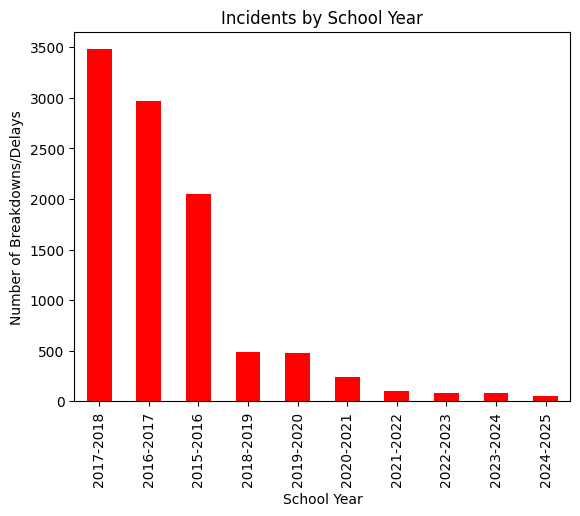

In [10]:
##plotting incidents by school year
import matplotlib.pyplot as plt
df['School_Year'].value_counts().plot(kind='bar', color='red')
plt.xlabel('School Year')
plt.ylabel('Number of Breakdowns/Delays')
plt.title('Incidents by School Year')
plt.show()

In [11]:
##Which year had the highest incidents? What was the top reason for delay/breakdown?
##creating subset for 2017-2018 school year
df_2017 = df[df['School_Year'] == '2017-2018']
df_2017.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Breakdown/Delay Reason,Schools_Serviced,Occurred_On,Created_On,Borough,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus
1087,2017-2018,1424117,Special Ed AM Run,44127,W828,Heavy Traffic,75944,3/26/2018 7:12,3/26/2018 7:13,Westchester,"MONTAUK STUDENT TRANS, INC. (B2321)",16-30 Min,0
1168,2017-2018,1401862,Special Ed AM Run,VN0234,W940,Heavy Traffic,75816,1/10/2018 6:39,1/10/2018 7:06,Westchester,VAN TRANS LLC (B2192),46-60 Min,0
2382,2017-2018,1424679,Special Ed AM Run,24621,X082,Heavy Traffic,"8,138,083,760,841,300,000",3/27/2018 7:51,3/27/2018 7:53,Bronx,VAN TRANS LLC (B2192),0-15 Min,19
2530,2017-2018,1424715,Special Ed AM Run,GC0098,Y875,Heavy Traffic,"1,208,412,450",3/27/2018 8:09,3/27/2018 8:15,Bronx,G.V.C. LTD. (B2192),0-15 Min,3
2801,2017-2018,1424964,Special Ed AM Run,74645,X312,Heavy Traffic,"841,008,447",3/28/2018 6:47,3/28/2018 6:50,Bronx,VAN TRANS LLC (B2192),0-15 Min,5


In [12]:
##grouping 2017-2018 by breakdown/delay reason
df_2017.groupby('Breakdown/Delay Reason').count()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Schools_Serviced,Occurred_On,Created_On,Borough,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus
Breakdown/Delay Reason,,,,,,,,,,,,
Accident,138,138,138,138,138,138,138,138,138,138,138,138
Delayed by School,34,34,34,34,34,34,34,34,34,34,34,34
Flat Tire,110,110,110,110,110,110,110,110,110,110,110,110
Heavy Traffic,2377,2377,2377,2377,2377,2377,2377,2377,2377,2377,2377,2377
Late return from Field Trip,62,62,62,62,62,62,62,62,62,62,62,62
Mechanical Problem,94,94,94,94,94,94,94,94,94,94,94,94
Other,354,354,354,354,354,354,354,354,354,354,354,354
Problem Run,66,66,66,66,66,66,66,66,66,66,66,66
Weather Conditions,151,151,151,151,151,151,151,151,151,151,151,151


In [13]:
##grouping reasons for 2017-2018
df_2017['Breakdown/Delay Reason'].value_counts()

,count
Breakdown/Delay Reason,
Heavy Traffic,2377
Other,354
Weather Conditions,151
Accident,138
Flat Tire,110
Won`t Start,94
Mechanical Problem,94
Problem Run,66
Late return from Field Trip,62


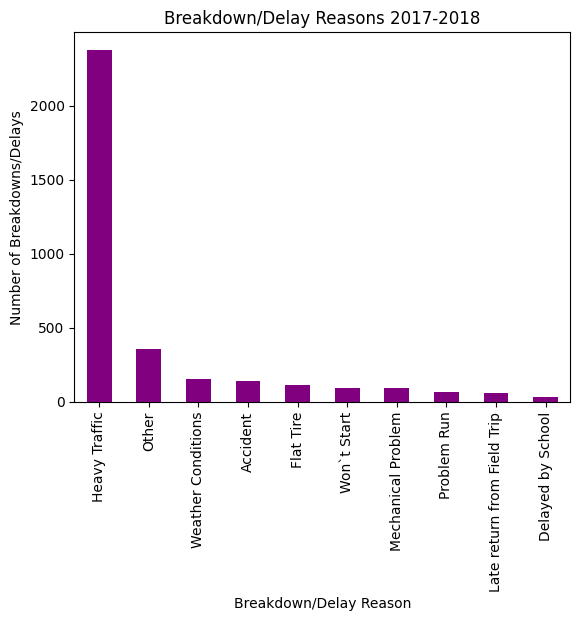

In [14]:
##plotting breakdown reasons for 2017-2018
import matplotlib.pyplot as plt
df_2017['Breakdown/Delay Reason'].value_counts().plot(kind='bar', color= 'purple')
plt.xlabel('Breakdown/Delay Reason')
plt.ylabel('Number of Breakdowns/Delays')
plt.title('Breakdown/Delay Reasons 2017-2018')
plt.show()

In [15]:
##creating subset for 2023-2024 school year
df_2023 = df[df['School_Year'] == '2023-2024']
df_2023.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Breakdown/Delay Reason,Schools_Serviced,Occurred_On,Created_On,Borough,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus
511642,2023-2024,1842813,Special Ed PM Run,658,X361,Accident,"725,907,434",9/19/2023 3:02,9/19/2023 16:02,Bronx,PIONEER TRANSPORTATION CORP,31-45 Min,5
525789,2023-2024,1843158,Special Ed AM Run,GC0034,X694,Problem Run,"1,145,511,647",9/20/2023 7:40,9/20/2023 8:21,Bronx,G.V.C. LTD. (B2192),46-60 Min,7
547928,2023-2024,1844005,Special Ed AM Run,5346,K030,Other,"1,608,116,409",9/22/2023 7:15,9/22/2023 7:20,Brooklyn,JOFAZ TRANSPORTATION INC.,61-90 Min,6
550936,2023-2024,1841374,Special Ed AM Run,11992,Q075,Accident,"280,482,844,728,449",9/15/2023 6:50,9/15/2023 7:56,Queens,PRIDE TRANSPORTATION (SCH AGE),61-90 Min,2
554436,2023-2024,1841470,Special Ed PM Run,10420,P589,Accident,27123,9/15/2023 12:40,9/15/2023 13:11,Nassau County,HOYT TRANSPORTATION CORP.,16-30 Min,0


In [16]:
##grouping reasons for 2023-2024
df_2023['Breakdown/Delay Reason'].value_counts()

,count
Breakdown/Delay Reason,
Accident,42
Other,26
Heavy Traffic,5
Problem Run,2
Weather Conditions,2
Mechanical Problem,1
Delayed by School,1


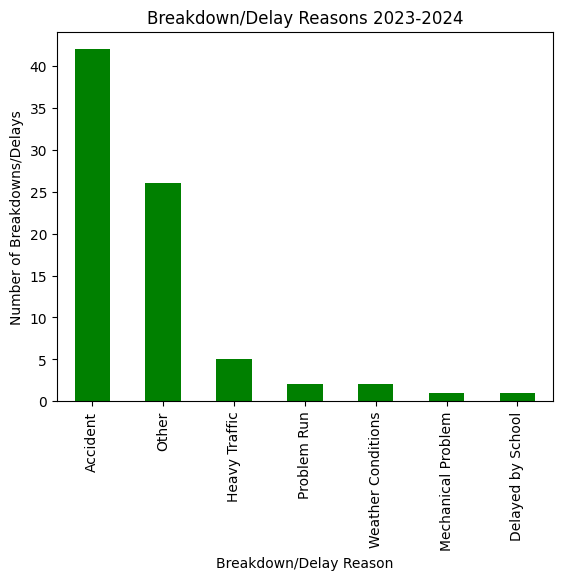

In [17]:
#plotting 2023-2024 reasons
import matplotlib.pyplot as plt
df_2023['Breakdown/Delay Reason'].value_counts().plot(kind='bar', color= 'green')
plt.xlabel('Breakdown/Delay Reason')
plt.ylabel('Number of Breakdowns/Delays')
plt.title('Breakdown/Delay Reasons 2023-2024')
plt.show()

In [18]:
##Conclusion- Since 2017-2018 school year, delays/breakdowns are decreasing annually
##2017-2018 had the highest reported incidents
##Comparing the most recent year to top reported year, incidents reported have decreased by 97.73%
##Top reported reason for 2017-2018 shcool year is not the same as the top reported reason for 2023-2024 school year